### Question 1
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

In [1]:
# Step 1: Import the necessary libraries
import pandas as pd

# Step 2: Import the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, delimiter='|')

# Step 3: Assign it to a variable called users

# Step 4: Discover the mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()

# Step 5: Discover the Male ratio per occupation and sort it from most to least
def male_ratio(group):
    total_users = group['gender'].count()
    male_users = (group['gender'] == 'M').sum()
    return male_users / total_users

male_ratio_per_occupation = users.groupby('occupation').apply(male_ratio)
male_ratio_per_occupation = male_ratio_per_occupation.sort_values(ascending=False)

# Step 6: For each occupation, calculate the minimum and maximum ages
age_range_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])

# Step 7: For each combination of occupation and sex, calculate the mean age
mean_age_per_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean()
# Step 8: For each occupation, present the percentage of women and men
def gender_percentage(group):
    total_users = group['gender'].count()
    male_users = (group['gender'] == 'M').sum()
    female_users = (group['gender'] == 'F').sum()
    male_percentage = (male_users / total_users) * 100
    female_percentage = (female_users / total_users) * 100
    return pd.Series({'Male %': male_percentage, 'Female %': female_percentage})

gender_percentage_per_occupation = users.groupby('occupation').apply(gender_percentage)

# Print the results
print("Mean age per occupation:")
print(mean_age_per_occupation)

print("\nMale ratio per occupation:")
print(male_ratio_per_occupation)

print("\nMinimum and maximum ages per occupation:")
print(age_range_per_occupation)

print("\nMean age per occupation and sex:")
print(mean_age_per_occupation_sex)

print("\nGender percentage per occupation:")
print(gender_percentage_per_occupation)

Mean age per occupation:
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male ratio per occupation:
occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.6

Question 3:

In [2]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np

# Step 2: Create 3 different Series
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

# Step 3: Create a DataFrame by joining the Series by column
data = pd.concat([series1, series2, series3], axis=1)
data.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Step 4: Change the name of the columns
data.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Step 5: Create a one-column DataFrame and assign it to 'bigcolumn'
bigcolumn = pd.concat([series1, series2, series3], axis=0, ignore_index=True)

# Step 6: Check if it's true that it's only going until index 99
print("Is it true that 'bigcolumn' goes only until index 99:", bigcolumn.index.max() == 99)

# Step 7: Reindex the DataFrame to go from 0 to 299
bigcolumn = bigcolumn.reset_index(drop=True)

# Print the results
print("DataFrame 'data':")
print(data)

print("\nOne-column DataFrame 'bigcolumn':")
print(bigcolumn)

Is it true that 'bigcolumn' goes only until index 99: False
DataFrame 'data':
    bedrs  bathrs  price_sqr_meter
0       3       1            26324
1       3       1            22979
2       1       2            16039
3       4       3            22791
4       1       2            26823
..    ...     ...              ...
95      2       2            18390
96      3       2            19237
97      4       3            15825
98      1       1            13100
99      1       2            18868

[100 rows x 3 columns]

One-column DataFrame 'bigcolumn':
0          3
1          3
2          1
3          4
4          1
       ...  
295    18390
296    19237
297    15825
298    13100
299    18868
Length: 300, dtype: int32


Question 5:

In [3]:
# Step 1: Import the necessary libraries
import pandas as pd

# Step 2: Import the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, delimiter='\t')

# Step 3: Assign it to a variable called chipo

# Step 4: See the first 10 entries
print("First 10 entries:")
print(chipo.head(10))

# Step 5: Number of observations in the dataset
num_observations = len(chipo)

# Step 6: Number of columns in the dataset
num_columns = len(chipo.columns)

# Step 7: Print the name of all the columns
print("\nColumn names:")
print(chipo.columns)

# Step 8: How is the dataset indexed?
print("\nIndex type:", chipo.index)

# Step 9: Most-ordered item
most_ordered_item = chipo['item_name'].value_counts().idxmax()

# Step 10: Number of items ordered for the most-ordered item
num_most_ordered = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()

# Step 11: Most ordered item in the choice_description column
most_ordered_choice = chipo['choice_description'].value_counts().idxmax()

# Step 12: Total number of items ordered
total_items_ordered = chipo['quantity'].sum()

# Step 13: Convert item price to float and check type
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print("\nItem price type after conversion:", chipo['item_price'].dtype)

# Step 14: Calculate revenue for the period
revenue = (chipo['quantity'] * chipo['item_price']).sum()

# Step 15: Number of orders made in the period
num_orders = chipo['order_id'].nunique()

# Step 16: Average revenue amount per order
average_revenue_per_order = revenue / num_orders

# Step 17: Number of different items sold
num_different_items = chipo['item_name'].nunique()

# Print the results
print("\nNumber of observations in the dataset:", num_observations)
print("Number of columns in the dataset:", num_columns)
print("Most-ordered item:", most_ordered_item)
print("Number of items ordered for the most-ordered item:", num_most_ordered)
print("Most ordered item in choice_description column:", most_ordered_choice)
print("Total number of items ordered:", total_items_ordered)
print("Total revenue:", revenue)
print("Number of orders:", num_orders)
print("Average revenue per order:", average_revenue_per_order)
print("Number of different items sold:", num_different_items)

First 10 entries:
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3            

Question 6:

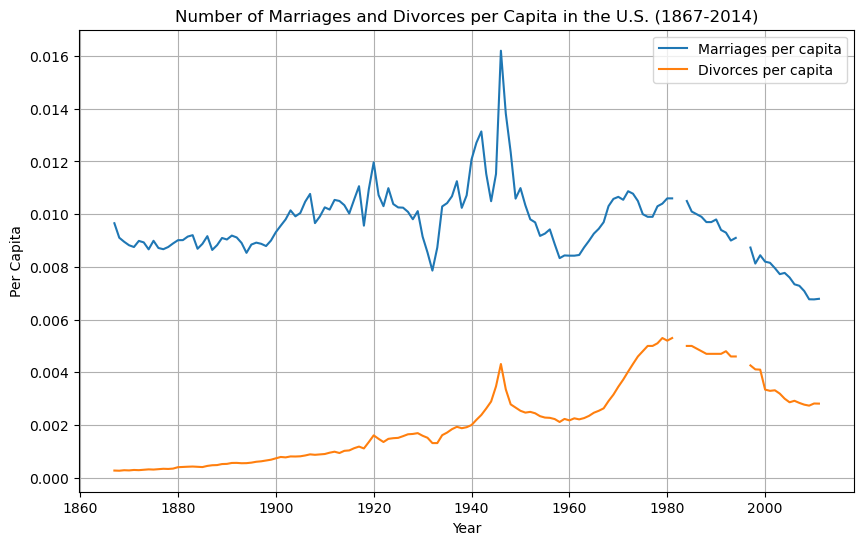

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (assuming you have a CSV file with columns: Year, Marriages, Divorces, Population)
# Replace 'data.csv' with the actual filename and adjust the columns accordingly
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Calculate per capita values
data['Marriages_per_capita'] = data['Marriages'] / data['Population']
data['Divorces_per_capita'] = data['Divorces'] / data['Population']

# Create the line plot
plt.figure(figsize=(10, 6))

plt.plot(data['Year'], data['Marriages_per_capita'], label='Marriages per capita')
plt.plot(data['Year'], data['Divorces_per_capita'], label='Divorces per capita')

plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.legend()
plt.grid(True)

plt.show()

Question 7:

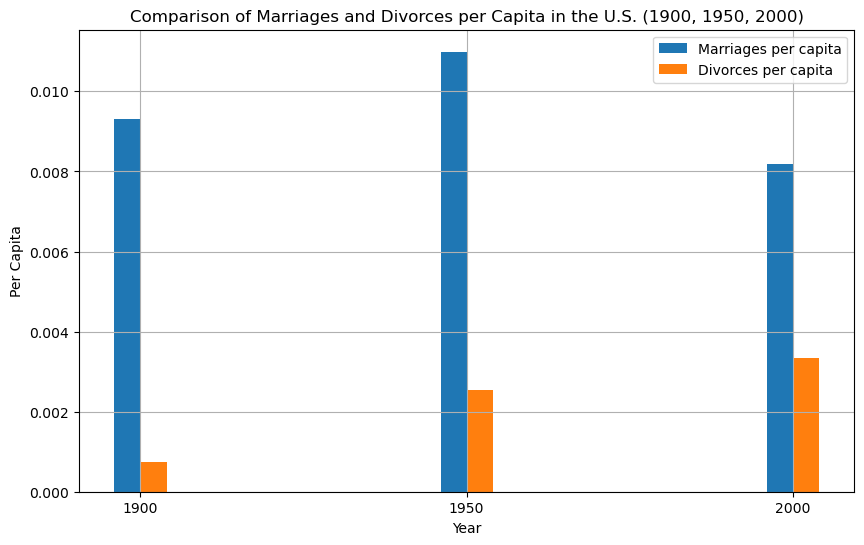

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (assuming you have a CSV file with columns: Year, Marriages, Divorces, Population)
# Replace 'data.csv' with the actual filename and adjust the columns accordingly
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Calculate per capita values
data['Marriages_per_capita'] = data['Marriages'] / data['Population']
data['Divorces_per_capita'] = data['Divorces'] / data['Population']

# Filter data for the years 1900, 1950, and 2000
years_of_interest = [1900, 1950, 2000]
filtered_data = data[data['Year'].isin(years_of_interest)]

# Create the vertical bar chart
plt.figure(figsize=(10, 6))

plt.bar(filtered_data['Year'] - 2, filtered_data['Marriages_per_capita'], width=4, label='Marriages per capita')
plt.bar(filtered_data['Year'] + 2, filtered_data['Divorces_per_capita'], width=4, label='Divorces per capita')

plt.title('Comparison of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.xticks(years_of_interest)
plt.legend()
plt.grid(True)

plt.show()


Question 8:

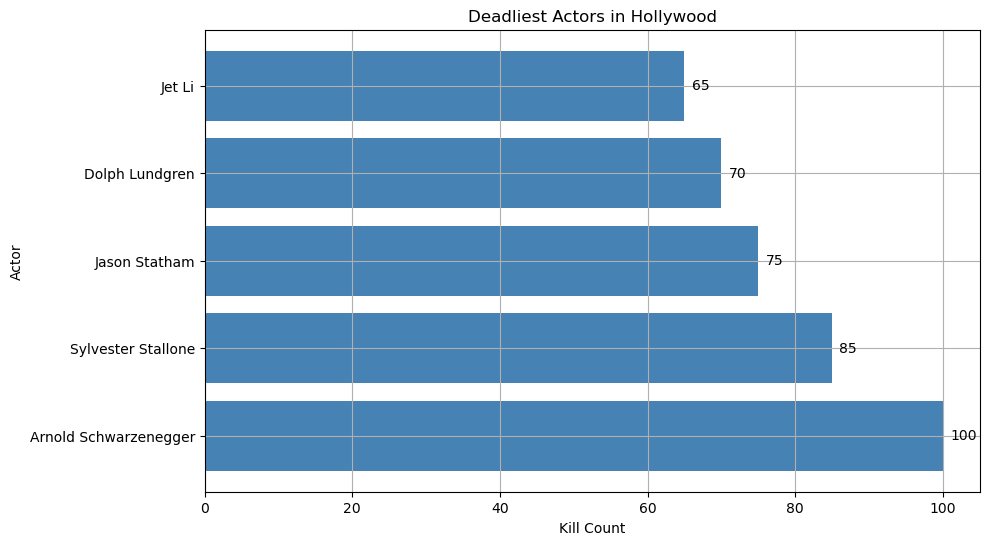

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for illustration purposes
data = {
    'Actor': ['Arnold Schwarzenegger', 'Sylvester Stallone', 'Jason Statham', 'Dolph Lundgren', 'Jet Li'],
    'Kill_Count': [100, 85, 75, 70, 65]
}

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Sort the DataFrame by Kill_Count in descending order
df.sort_values(by='Kill_Count', ascending=False, inplace=True)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))

plt.barh(df['Actor'], df['Kill_Count'], color='steelblue')
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.grid(True)

# Label each bar with the corresponding actor's name
for index, value in enumerate(df['Kill_Count']):
    plt.text(value + 1, index, str(value), va='center', color='black')

plt.show()

Question 9:

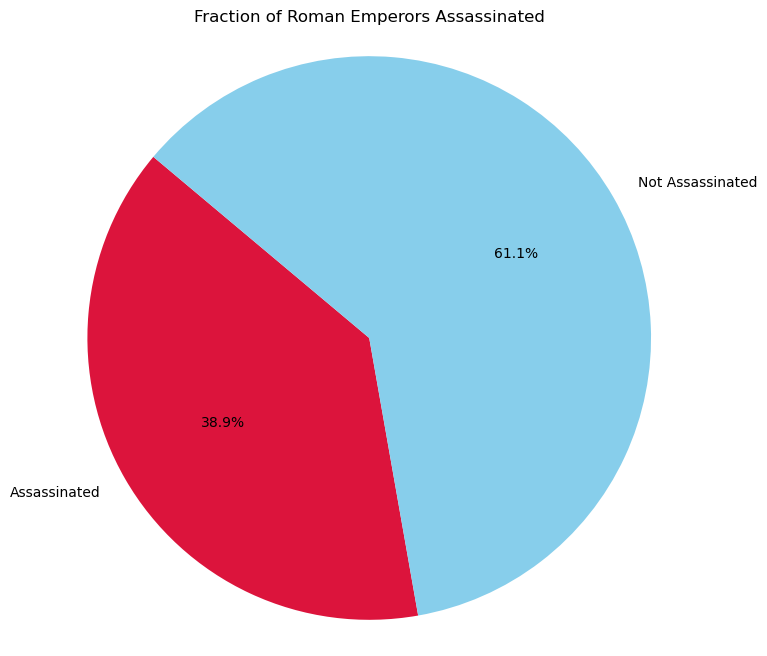

In [9]:
import matplotlib.pyplot as plt

# Sample data for illustration purposes
data = {
    'Category': ['Assassinated', 'Not Assassinated'],
    'Count': [35, 55]  # Replace with actual counts
}

# Create a pie chart
plt.figure(figsize=(8, 8))

plt.pie(data['Count'], labels=data['Category'], autopct='%1.1f%%', startangle=140, colors=['crimson', 'skyblue'])
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.title('Fraction of Roman Emperors Assassinated')

plt.show()

Question 10:

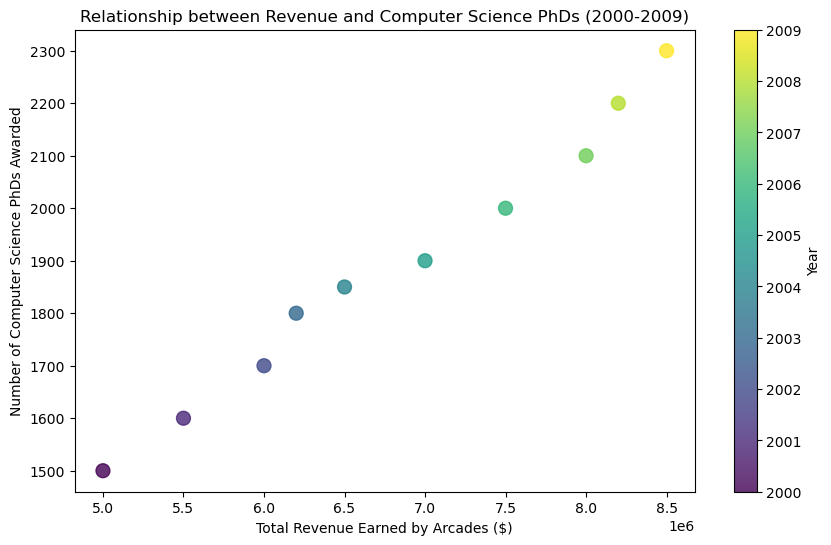

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for illustration purposes
data = {
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009],
    'Revenue': [5000000, 5500000, 6000000, 6200000, 6500000, 7000000, 7500000, 8000000, 8200000, 8500000],
    'CS_PhDs': [1500, 1600, 1700, 1800, 1850, 1900, 2000, 2100, 2200, 2300]
}

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Create the scatter plot
plt.figure(figsize=(10, 6))

plt.scatter(df['Revenue'], df['CS_PhDs'], c=df['Year'], cmap='viridis', s=100, alpha=0.8)
plt.colorbar(label='Year')

plt.title('Relationship between Revenue and Computer Science PhDs (2000-2009)')
plt.xlabel('Total Revenue Earned by Arcades ($)')
plt.ylabel('Number of Computer Science PhDs Awarded')

plt.show()